### EXPLORATORY DATA ANALYSIS OF THE INDIAN STARTUP FUNDING ECOSYSTEM.

### Business understanding

Start-up funding plays a crucial role providing essential capital to nurture new ventures that drive economic growth and technological advancement.Indian startups ecosystem span across various sectors and domains, such as e-commerce, fintech, edtech, healthtech, and agritech. This project aims to equip the team with the knowledge and strategic insights on identifying the most promising sectors, cities, funding trends, and key players necessary to make informed decisions and successfully engage with the dynamic and rapidly evolving Indian start-up ecosystem.


### Data understanding

The datasets contains information about startup funding from 2018 to 2021. It includes various attributes such as the company’s name, sector, funding amount, stage, investor details, and location.

The key attributes in the dataset include:

**Company/Brand**: Name of the company/start-up

**Founded**: Year start-up was founded

**Sector**: Sector of service

**What it does**: Description about Company

**Founders**: Founders of the Company

**Investor**: Investors

**Amount($)**: Raised fund

**Stage**: Round of funding reached

**Headquarters**: Location of the starup_company


### Hypothesis

Null Hypothesis (H0): Funding to start-ups is centralized around specific locations and sectors.

Alternative Hypothesis (H1): Funding to start-ups is spread across different locations and sectors.

### Research Questions

1.How has funding to startups changed over the period of time?

2.What is the average amount of funding for start-ups ?

3.Which headquarter is the most preferred startup location?

4.Which sectors are most favoured by investors?

5.What are the most common funding stages among indian startups?

6.Who are the top investors by the amount invested?


In [1]:
! pip install pyodbc
! pip install scipy
! pip install fuzzywuzzy

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


**Import all necessary packages and libraries.**


In [2]:
import pyodbc
from dotenv import dotenv_values
import pandas as pd
import warnings
import numpy as np
import datetime as dt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from fuzzywuzzy import process
import squarify
import re
pd.set_option('display.max_columns', None)

warnings.filterwarnings('ignore')

C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [3]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')

# Get the values for the credentials you set in the '.env' file
server = environment_variables.get("server")
database = environment_variables.get("database")
username = environment_variables.get("username")
password = environment_variables.get("password")

In [4]:
# Creating a connection string for the database
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password};MARS_Connection=yes;MinProtocolVersion=TLSv1.2;"

In [5]:
# Creating a connection to the database
connection = pyodbc.connect(connection_string)

### Loading the datasets


2018 datasets

In [6]:
# Loading funding year_2018
data_2018 = pd.read_csv('C:/Users/HP/OneDrive/Desktop/Github projects/Indian-start-up-Ecosystem/Data/startup_funding2018.csv')
data_2018.head()

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...


2019 datasets

In [7]:
# Loading funding year_2019
data_2019 = pd.read_csv('C:/Users/HP/OneDrive/Desktop/Github projects/Indian-start-up-Ecosystem/Data/startup_funding2019.csv')
data_2019.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN


2020 dataset

In [8]:
# Loading funding year_2020
query = "SELECT * FROM dbo.LP1_startup_funding2020"
data_2020 = pd.read_sql(query, connection)
data_2020.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None


In [9]:

# Convert DataFrame to CSV file
data_2020.to_csv('startup_funding_2020.csv', index=False)

2021 dataset

In [10]:
# Loading funding year_2021
query2 = "SELECT * FROM dbo.LP1_startup_funding2021"
data_2021 = pd.read_sql(query2, connection)

data_2021.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


In [11]:
# Convert DataFrame to CSV file
data_2021.to_csv('startup_funding_2021.csv', index=False)

### Exploratory Data Analysis: EDA

In [12]:
data_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   526 non-null    object
 1   Industry       526 non-null    object
 2   Round/Series   526 non-null    object
 3   Amount         526 non-null    object
 4   Location       526 non-null    object
 5   About Company  526 non-null    object
dtypes: object(6)
memory usage: 24.8+ KB


In [13]:
data_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount($)      89 non-null     object 
 8   Stage          43 non-null     object 
dtypes: float64(1), object(8)
memory usage: 6.4+ KB


In [14]:
data_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1055 non-null   object 
 1   Founded        842 non-null    float64
 2   HeadQuarter    961 non-null    object 
 3   Sector         1042 non-null   object 
 4   What_it_does   1055 non-null   object 
 5   Founders       1043 non-null   object 
 6   Investor       1017 non-null   object 
 7   Amount         801 non-null    float64
 8   Stage          591 non-null    object 
 9   column10       2 non-null      object 
dtypes: float64(2), object(8)
memory usage: 82.5+ KB


In [15]:
data_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   HeadQuarter    1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   What_it_does   1209 non-null   object 
 5   Founders       1205 non-null   object 
 6   Investor       1147 non-null   object 
 7   Amount         1206 non-null   object 
 8   Stage          781 non-null    object 
dtypes: float64(1), object(8)
memory usage: 85.1+ KB


### Data Cleaning And Preparation

In [16]:
# Add the funding_year to the dataset.
data_2018['Funding_Year'] = 2018
data_2019['Funding_Year'] = 2019
data_2020['Funding_Year'] = 2020
data_2021['Funding_Year'] = 2021

In [17]:
# Renaming the column names for consistency with the existing  column names.
data_2018.rename(columns={
    'Round/Series': 'Stage',
    'Location': 'HeadQuarter',
    'About Company': 'What_it_does',
    'Industry':'Sector',
    'Company Name':'Company_Name',
}, inplace=True)

data_2019.rename(columns={
    'Company/Brand':'Company_Name',
    'What it does': 'What_it_does'
}, inplace=True)

data_2020.rename(columns={
    'Company_Brand':'Company_Name',
    'Amount':'Amount($)'
}, inplace=True)

data_2021.rename(columns={
    'Company_Brand':'Company_Name',
    'Amount':'Amount($)'
}, inplace=True)

### Cleaning Year_2018

In [18]:
data_2018.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Company_Name,526,525,TheCollegeFever,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sector,526,405,—,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stage,526,21,Seed,280,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Amount,526,198,—,148,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HeadQuarter,526,50,"Bangalore, Karnataka, India",102,NaN,NaN,NaN,NaN,NaN,NaN,NaN
What_it_does,526,524,"TheCollegeFever is a hub for fun, fiesta and f...",2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Funding_Year,526.0,NaN,NaN,NaN,2018.0,0.0,2018.0,2018.0,2018.0,2018.0,2018.0


### Observations in 2018 dataset

1. Amount has datatype as object. It should be a float data type
2. There are different currencies in the Amount column. All currencies are supposed to be in dollars. 
 All commas, dashes attached to the Amounts should be removed. 
3. There is 1 duplicated information in the dataset(Company Name = TheCollegeFever)
4. Location column is not consistent with the rest of the dataset. It contains city, State, and Country.
5. Column name is not consistent with other datasets.Renaming of the column will be done.

Headquarter and sector columns has multiple information

In [19]:
# Standardizing the 'HeadQuarter' column in the 2018 data

data_2018['HeadQuarter'] = (
    data_2018['HeadQuarter']
                   .astype(str)                 # Convert to string
                   .str.split(',').str[0]       # Split by comma and take the first part
                   .str.replace("'", "", regex=True)  # Remove single quotes
)

In [20]:
# Standardizing the 'Sector' column in the 2018 data

data_2018['Sector']=(
     data_2018['Sector']
                     .astype(str)    # Convert to string
                     .str.split(',').str[0]              # Split by comma and take the first part
                     .str.replace("'", "", regex=True)   # Remove single quotes
)

The average Indian Rupee (INR) to US Dollar (USD) rate for the relevant year will be used for currency conversions.
Use exchange rate from https://www.exchangerates.org.uk/INR-USD-spot-exchange-rates-history-2018.html, use the average exchange rate of 0.0146

In [21]:

# Replace '$' currency symbol and commas with empty string
data_2018['Amount'] = data_2018['Amount'].str.replace(',', '', regex=False).str.replace('$', '', regex=False)

# Standardize the amount column by multiplying INR('₹') values by 0.0146 (Average currency rate INR to USD in 2018) 
data_2018.loc[data_2018['Amount'].astype(str).str.contains('₹'), 'Amount'] = data_2018.loc[data_2018['Amount'].astype(str).
str.contains('₹'),'Amount'].apply(lambda x: float(x.replace('₹', ''))*0.0146)

# Convert 'Amount' column to numeric datatype, replacing any non-numeric values with NaN using the 'coerce' option
data_2018['Amount'] = pd.to_numeric(data_2018['Amount'], errors='coerce')

# Rename column "Amount" to "Amount($)"
data_2018.rename(columns={'Amount':'Amount($)'}, inplace=True)

# Convert Amount($) column from object to float datatype
data_2018['Amount($)'] = data_2018['Amount($)'].astype(float)

# The updated dataframe
data_2018.head(5)

,Company_Name,Sector,Stage,Amount($),HeadQuarter,What_it_does,Funding_Year
0,TheCollegeFever,Brand Marketing,Seed,250000.0,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",2018
1,Happy Cow Dairy,Agriculture,Seed,584000.0,Mumbai,A startup which aggregates milk from dairy far...,2018
2,MyLoanCare,Credit,Series A,949000.0,Gurgaon,Leading Online Loans Marketplace in India,2018
3,PayMe India,Financial Services,Angel,2000000.0,Noida,PayMe India is an innovative FinTech organizat...,2018
4,Eunimart,E-Commerce Platforms,Seed,NaN,Hyderabad,Eunimart is a one stop solution for merchants ...,2018


### Cleaning Year_2019 

In [22]:
data_2019.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Company_Name,89,87,Kratikal,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Founded,60.0,NaN,NaN,NaN,2014.533333,2.937003,2004.0,2013.0,2015.0,2016.25,2019.0
HeadQuarter,70,17,Bangalore,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sector,84,52,Edtech,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
What_it_does,89,88,Online meat shop,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Founders,86,85,"Vivek Gupta, Abhay Hanjura",2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Investor,89,86,Undisclosed,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Amount($),89,50,Undisclosed,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stage,43,15,Series A,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Funding_Year,89.0,NaN,NaN,NaN,2019.0,0.0,2019.0,2019.0,2019.0,2019.0,2019.0


In [23]:
data_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company_Name  89 non-null     object 
 1   Founded       60 non-null     float64
 2   HeadQuarter   70 non-null     object 
 3   Sector        84 non-null     object 
 4   What_it_does  89 non-null     object 
 5   Founders      86 non-null     object 
 6   Investor      89 non-null     object 
 7   Amount($)     89 non-null     object 
 8   Stage         43 non-null     object 
 9   Funding_Year  89 non-null     int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 7.1+ KB


In [24]:
data_2019.head()

,Company_Name,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount($),Stage,Funding_Year
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN,2019
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C,2019
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding,2019
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D,2019
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN,2019


### Observations 
1. There are lots NaN values in the Stage, HeadQuaters and Founded columns
2. There is the currency sign and commas attached to the amounts would be removed and have amount changed as Amount($)
3.  Amount column is in object.would be changed to Integer or Float
4. Company/Brand column must be renamed to Company_Name


In [25]:

# Replace '$' currency symbol and commas with empty string

data_2019['Amount($)'] = data_2019['Amount($)'].str.replace(',', '', regex=False).str.replace('$', '', regex=False)
data_2019['Amount($)']

0       6300000 
1     150000000 
2      28000000 
3      30000000 
4       6000000 
         ...    
84     20000000 
85    693000000 
86      5000000 
87     50000000 
88     33000000 
Name: Amount($), Length: 89, dtype: object

### Cleaning Year_2020 

In [26]:
data_2020.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Company_Name,1055,905,Nykaa,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Founded,842.0,NaN,NaN,NaN,2015.36342,4.097909,1973.0,2014.0,2016.0,2018.0,2020.0
HeadQuarter,961,77,Bangalore,317,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sector,1042,302,Fintech,80,NaN,NaN,NaN,NaN,NaN,NaN,NaN
What_it_does,1055,990,Provides online learning classes,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Founders,1043,927,Falguni Nayar,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Investor,1017,848,Venture Catalysts,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Amount($),801.0,NaN,NaN,NaN,113042969.543071,2476634939.888347,12700.0,1000000.0,3000000.0,11000000.0,70000000000.0
Stage,591,42,Series A,96,NaN,NaN,NaN,NaN,NaN,NaN,NaN
column10,2,2,Pre-Seed,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
data_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company_Name  1055 non-null   object 
 1   Founded       842 non-null    float64
 2   HeadQuarter   961 non-null    object 
 3   Sector        1042 non-null   object 
 4   What_it_does  1055 non-null   object 
 5   Founders      1043 non-null   object 
 6   Investor      1017 non-null   object 
 7   Amount($)     801 non-null    float64
 8   Stage         591 non-null    object 
 9   column10      2 non-null      object 
 10  Funding_Year  1055 non-null   int64  
dtypes: float64(2), int64(1), object(8)
memory usage: 90.8+ KB


In [28]:
data_2020.head()

,Company_Name,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount($),Stage,column10,Funding_Year
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None,2020
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None,2020
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None,2020
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None,2020
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None,2020


### Observations
1. Column10" has no influence on the dataset
2. There is the currency sign,dashes and commas attached to the amounts.



### Cleaning Year_2021 

In [29]:
data_2021.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Company_Name,1209,1033,BharatPe,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Founded,1208.0,NaN,NaN,NaN,2016.655629,4.517364,1963.0,2015.0,2018.0,2020.0,2021.0
HeadQuarter,1208,70,Bangalore,426,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sector,1209,254,FinTech,122,NaN,NaN,NaN,NaN,NaN,NaN,NaN
What_it_does,1209,1143,BharatPe develops a QR code-based payment app ...,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Founders,1205,1095,"Ashneer Grover, Shashvat Nakrani",7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Investor,1147,937,Inflection Point Ventures,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Amount($),1206,278,$Undisclosed,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stage,781,31,Seed,246,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Funding_Year,1209.0,NaN,NaN,NaN,2021.0,0.0,2021.0,2021.0,2021.0,2021.0,2021.0


In [30]:
data_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company_Name  1209 non-null   object 
 1   Founded       1208 non-null   float64
 2   HeadQuarter   1208 non-null   object 
 3   Sector        1209 non-null   object 
 4   What_it_does  1209 non-null   object 
 5   Founders      1205 non-null   object 
 6   Investor      1147 non-null   object 
 7   Amount($)     1206 non-null   object 
 8   Stage         781 non-null    object 
 9   Funding_Year  1209 non-null   int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 94.6+ KB


In [31]:
data_2021.head()

,Company_Name,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount($),Stage,Funding_Year
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A,2021
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None,2021
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D,2021
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C,2021
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed,2021


#### Observations
1. There is the currency sign and commas attached to the amounts.
2. There are lots of NaN values
3. There are duplicated values 


In [32]:
data_2021['Amount($)'] = data_2021['Amount($)'].str.replace(',', '', regex=False).str.replace('$', '', regex=False)
data_2021['Amount($)']

0         1200000
1       120000000
2        30000000
3        51000000
4         2000000
          ...    
1204      3000000
1205     20000000
1206     55000000
1207     26000000
1208      8000000
Name: Amount($), Length: 1209, dtype: object

### Merging datasets

In [33]:
data_combined = pd.concat([data_2021, data_2020, data_2019,data_2018], ignore_index=True)
data_combined.head(10)

,Company_Name,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount($),Stage,Funding_Year,column10
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First",1200000,Pre-series A,2021,NaN
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management",120000000,None,2021,NaN
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital",30000000,Series D,2021,NaN
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital",51000000,Series C,2021,NaN
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal",2000000,Seed,2021,NaN
5,Urban Company,2014.0,New Delhi,Home services,Urban Company (Formerly UrbanClap) is a home a...,"Abhiraj Singh Bhal, Raghav Chandra, Varun Khaitan",Vy Capital,188000000,None,2021,NaN
6,Comofi Medtech,2018.0,Bangalore,HealthTech,Comofi Medtech is a healthcare robotics startup.,Gururaj KB,"CIIE.CO, KIIT-TBI",200000,None,2021,NaN
7,Qube Health,2016.0,Mumbai,HealthTech,India's Most Respected Workplace Healthcare Ma...,Gagan Kapur,Inflection Point Ventures,Undisclosed,Pre-series A,2021,NaN
8,Vitra.ai,2020.0,Bangalore,Tech Startup,Vitra.ai is an AI-based video translation plat...,Akash Nidhi PS,Inflexor Ventures,Undisclosed,None,2021,NaN
9,Taikee,2010.0,Mumbai,E-commerce,"Taikee is the ISO-certified, B2B e-commerce pl...","Nidhi Ramachandran, Sachin Chhabra",None,1000000,None,2021,NaN


In [34]:
data_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2879 entries, 0 to 2878
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company_Name  2879 non-null   object 
 1   Founded       2110 non-null   float64
 2   HeadQuarter   2765 non-null   object 
 3   Sector        2861 non-null   object 
 4   What_it_does  2879 non-null   object 
 5   Founders      2334 non-null   object 
 6   Investor      2253 non-null   object 
 7   Amount($)     2474 non-null   object 
 8   Stage         1941 non-null   object 
 9   Funding_Year  2879 non-null   int64  
 10  column10      2 non-null      object 
dtypes: float64(1), int64(1), object(9)
memory usage: 247.5+ KB


Checking for duplicates

In [35]:
duplicates= data_combined.duplicated(keep=False)

# Count the number of occurrences of each unique value in the boolean mask
value_counts = duplicates.value_counts()

value_counts


False    2833
True       46
Name: count, dtype: int64

In [36]:
# Identify duplicate rows based on all columns
duplicates = data_combined[data_combined.duplicated(keep=False)]
duplicates

,Company_Name,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount($),Stage,Funding_Year,column10
94,Curefoods,2020.0,Bangalore,Food & Beverages,Healthy & nutritious foods and cold pressed ju...,Ankit Nagori,"Iron Pillar, Nordstar, Binny Bansal",13000000,None,2021,NaN
96,Bewakoof,2012.0,Mumbai,Apparel & Fashion,Bewakoof is a lifestyle fashion brand that mak...,Prabhkiran Singh,InvestCorp,8000000,None,2021,NaN
98,FanPlay,2020.0,Computer Games,Computer Games,A real money game app specializing in trivia g...,YC W21,"Pritesh Kumar, Bharat Gupta",Upsparks,$1200000,2021,NaN
104,Advantage Club,2014.0,Mumbai,HRTech,Advantage Club is India's largest employee eng...,"Sourabh Deorah, Smiti Bhatt Deorah","Y Combinator, Broom Ventures, Kunal Shah",1700000,None,2021,NaN
106,Ruptok,2020.0,New Delhi,FinTech,Ruptok fintech Pvt. Ltd. is an online gold loa...,Ankur Gupta,Eclear Leasing,1000000,None,2021,NaN
107,Curefoods,2020.0,Bangalore,Food & Beverages,Healthy & nutritious foods and cold pressed ju...,Ankit Nagori,"Iron Pillar, Nordstar, Binny Bansal",13000000,None,2021,NaN
109,Bewakoof,2012.0,Mumbai,Apparel & Fashion,Bewakoof is a lifestyle fashion brand that mak...,Prabhkiran Singh,InvestCorp,8000000,None,2021,NaN
111,FanPlay,2020.0,Computer Games,Computer Games,A real money game app specializing in trivia g...,YC W21,"Pritesh Kumar, Bharat Gupta",Upsparks,$1200000,2021,NaN
117,Advantage Club,2014.0,Mumbai,HRTech,Advantage Club is India's largest employee eng...,"Sourabh Deorah, Smiti Bhatt Deorah","Y Combinator, Broom Ventures, Kunal Shah",1700000,None,2021,NaN
119,Ruptok,2020.0,New Delhi,FinTech,Ruptok fintech Pvt. Ltd. is an online gold loa...,Ankur Gupta,Eclear Leasing,1000000,None,2021,NaN


In [37]:
# Drop one of the duplicates
data_combined.drop_duplicates(keep='first', inplace=True)

##### Handling incorrect values in the 'Amount($)', 'Stage' and 'HeadQuarter' columns

In [38]:
# Use str.contains() to find rows in the stage column that contain a dollar sign followed by a numerical value
incorrect = data_combined[data_combined['Stage'].str.contains(r'\$\d+', na=False)]
# The resulting rows
incorrect

,Company_Name,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount($),Stage,Funding_Year,column10
98,FanPlay,2020.0,Computer Games,Computer Games,A real money game app specializing in trivia g...,YC W21,"Pritesh Kumar, Bharat Gupta",Upsparks,$1200000,2021,NaN
538,Little Leap,2020.0,New Delhi,EdTech,Soft Skills that make Smart Leaders,Holistic Development Programs for children in ...,Vishal Gupta,ah! Ventures,$300000,2021,NaN
551,BHyve,2020.0,Mumbai,Human Resources,A Future of Work Platform for diffusing Employ...,Backed by 100x.VC,"Omkar Pandharkame, Ketaki Ogale",ITO Angel Network LetsVenture,$300000,2021,NaN
674,MYRE Capital,2020.0,Mumbai,Commercial Real Estate,Democratising Real Estate Ownership,Own rent yielding commercial properties,Aryaman Vir,None,$6000000,2021,NaN
677,Saarthi Pedagogy,2015.0,Ahmadabad,EdTech,"India's fastest growing Pedagogy company, serv...",Pedagogy,Sushil Agarwal,JITO Angel Network LetsVenture,$1000000,2021,NaN


In [39]:
# Define a list of indices to modify
indices_to_modify = [98, 538, 551, 674, 677]

# Loop through the rows in the 'incorrect' dataframe and replace the dollar amounts in the 'Stage' column with the values in the 'Amount($)' column for the specified indices
for index, row in incorrect.iterrows():
    if index in indices_to_modify:
        amount = row['Stage']
        if pd.notnull(amount):
            data_combined.loc[index, 'Amount($)'] = str(amount)

# Loop through the rows in the 'data_combined' dataframe and replace the values in the 'Stage' column with NaN for the specified indices
for index in indices_to_modify:
    data_combined.loc[index, 'Stage'] = np.nan

# Display the modified dataframe
data_combined.loc[[98, 538, 551, 674, 677]]

,Company_Name,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount($),Stage,Funding_Year,column10
98,FanPlay,2020.0,Computer Games,Computer Games,A real money game app specializing in trivia g...,YC W21,"Pritesh Kumar, Bharat Gupta",$1200000,NaN,2021,NaN
538,Little Leap,2020.0,New Delhi,EdTech,Soft Skills that make Smart Leaders,Holistic Development Programs for children in ...,Vishal Gupta,$300000,NaN,2021,NaN
551,BHyve,2020.0,Mumbai,Human Resources,A Future of Work Platform for diffusing Employ...,Backed by 100x.VC,"Omkar Pandharkame, Ketaki Ogale",$300000,NaN,2021,NaN
674,MYRE Capital,2020.0,Mumbai,Commercial Real Estate,Democratising Real Estate Ownership,Own rent yielding commercial properties,Aryaman Vir,$6000000,NaN,2021,NaN
677,Saarthi Pedagogy,2015.0,Ahmadabad,EdTech,"India's fastest growing Pedagogy company, serv...",Pedagogy,Sushil Agarwal,$1000000,NaN,2021,NaN


In [40]:
data_combined['Funding_Year'] = data_combined['Funding_Year'].astype('int')

#### Standardizing the stage column

In [41]:
def combine_similar_labels(labels_series, threshold=80):
    """
    Combines similar labels in a pandas Series based on text similarities.

    Args:
        labels_series (pd.Series): The Series containing labels.
        threshold (int, optional): Similarity threshold (default is 80).

    Returns:
        pd.Series: A new Series with combined labels.
    """
    # Ensure all labels are strings and handle NaN values
    labels_series = labels_series.fillna('').astype(str)

    # Create an empty dictionary to store combined labels
    combined_labels = {}

    # Iterate through each unique label
    for label in labels_series.unique():
        # Find close matches for the current label
        matches = process.extract(label, labels_series.unique(), limit=None)

        # Filter matches based on similarity threshold
        close_matches = [match[0] for match in matches if match[1] >= threshold]
        
        # Combine similar labels into a single label
        combined_label = ', '.join(close_matches)
        
        # Store the combined label
        combined_labels[label] = combined_label

    # Map the original labels to their combined versions
    combined_series = labels_series.map(combined_labels)

    # Restore NaN values if there were any
    combined_series = combined_series.replace('', pd.NA)

    return combined_series

# Combine similar labels
data_combined['Stage'] = combine_similar_labels(data_combined['Stage'], threshold=80)



In [42]:
#viewing the grouped sectors
data_combined['Stage'] = (data_combined
                     ['Stage']
                     .astype('category')
                     )
data_combined['Stage'].value_counts().nlargest(200)

Stage
Seed, Seed+, Pre-seed, Early seed, Seed A, Seed Funding, Pre-Seed, Seed round, Pre-seed Round, Seed Round & Series A, Pre seed Round, Seed Round, Pre seed round, Seed Investment, Seed funding, Seed fund                                                                                                                                                                                                                                                                                                                                                                                                                                                                600
Series A, Series A+, Series A-1, Series A2, Seies A, Pre-series A, Pre-series A1, Pre- series A, Seed Round & Series A, Pre Series A, Pre series A1, Pre series A, Post series A, Series D, Series C, Series B, Series E, Series G, Series F, Series H, Series I, Series B+, Pre-series B, Pre-series C, Pre-Series B, Pre series B, Pre series C, V

In [43]:
# Separating the combined lists and reducing to one sector
sep_sect = data_combined['Stage'].str.split(',', expand=True)

# Keeping only the first instance
data_combined['Stage'] = sep_sect[0].str.strip()

# Display the updated DataFrame
data_combined['Stage'].value_counts().nlargest(200)

Stage
Seed                                                                                                       600
Series A                                                                                                   305
Pre-series A                                                                                               282
Series B                                                                                                   135
Series C                                                                                                   114
Seed round                                                                                                  79
Pre-seed                                                                                                    66
Series D                                                                                                    50
Debt                                                                                                      

In [44]:
data_combined['Stage'] = data_combined['Stage'].replace("https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593", "NaN")

In [45]:
data_combined['Stage'].isnull().sum()

934

In [46]:
# Replace all missing values in the 'Stage' column with the string ""Undisclosed"".

data_combined['Stage'] = data_combined['Stage'].fillna("Undisclosed")

In [47]:
data_combined['HeadQuarter'].isna().sum()

114

In [48]:
# Replace all missing values in the 'HeadQuarter' column with the string "Unavailable".
data_combined['HeadQuarter'] = data_combined['HeadQuarter'].fillna('Unavailable')

In [49]:
# Replace the  value in index 98 of the 'HeadQuarter' column with the string "Unavailable".
data_combined.at[98, 'HeadQuarter'] = "Unavailable"

In [50]:
# Bangalore and Bengaluru are different names for the same city.
# Replace all occurrences of 'Bengaluru' with 'Bangalore' to maintain consistency in our dataset.
data_combined['HeadQuarter'] = data_combined['HeadQuarter'].str.replace('Bengaluru', 'Bangalore', case=False)
data_combined['HeadQuarter'] =data_combined['HeadQuarter'].str.replace('Bangalore city', 'Bangalore', case=False)

In [51]:
data_combined['Investor'].isna().sum()

624

In [52]:
# Replace all missing values in the 'Investor' column with the string "unidisclosed".
data_combined['Investor'] = data_combined['Investor'].fillna('unidisclosed')


In [53]:
# Replace all missing values in the 'Founders' column with the string "Unavailable".
data_combined['Founders'] = data_combined['Founders'].fillna('unavailable')

### Standardizing the Sector column

In [54]:
def combine_similar_labels(labels_series, threshold=80):
    """
    Combines similar labels in a pandas Series based on text similarities.

    Args:
        labels_series (pd.Series): The Series containing labels.
        threshold (int, optional): Similarity threshold (default is 80).

    Returns:
        pd.Series: A new Series with combined labels.
    """
    # Ensure all labels are strings and handle NaN values
    labels_series = labels_series.fillna('').astype(str)

    # Create an empty dictionary to store combined labels
    combined_labels = {}

    # Iterate through each unique label
    for label in labels_series.unique():
        # Find close matches for the current label
        matches = process.extract(label, labels_series.unique(), limit=None)

        # Filter matches based on similarity threshold
        close_matches = [match[0] for match in matches if match[1] >= threshold]
        
        # Combine similar labels into a single label
        combined_label = ', '.join(close_matches)
        
        # Store the combined label
        combined_labels[label] = combined_label

    # Map the original labels to their combined versions
    combined_series = labels_series.map(combined_labels)

    # Restore NaN values if there were any
    combined_series = combined_series.replace('', pd.NA)

    return combined_series



# Combine similar labels
data_combined['Sector'] = combine_similar_labels(data_combined['Sector'], threshold=80)


In [55]:
#viewing the grouped sectors
data_combined['Sector'] = (data_combined
                     ['Sector']
                     .astype('category')
                     )
data_combined['Sector'].value_counts().nlargest(200)

Sector
FinTech, Fintech, Tech                                                                                                                                                                                  259
EdTech, Edtech, Medtech, EdtTech, Tech, EdTech Startup, Healthcare/Edtech, SaaS/Edtech, Med Tech, Insuretech, SpaceTech, InsureTech, Spacetech                                                          221
E-commerce, E-Commerce, B2B E-commerce, Commerce, Ecommerce, Social e-commerce, E-commerce & AR, E-Commerce Platforms, Social commerce, Content commerce, Social Commerce, Agritech/Commerce, E-tail     95
Financial Services, Information Technology & Services, Facilities Support Services, Online financial service                                                                                             86
HealthCare, Healthcare, Healtcare, Health care, Heathcare, Health Care, Helathcare, Health, Healthcare/Edtech, Hospital & Health Care                                            

In [56]:
# Separating the combined lists and reducing to one sector
sep_sect = data_combined['Sector'].str.split(',', expand=True)

# Keeping only the first instance
data_combined['Sector'] = sep_sect[0].str.strip()

# Display the updated DataFrame
data_combined['Sector'].value_counts().nlargest(200)

Sector
FinTech               259
EdTech                221
E-commerce             95
Financial Services     86
HealthCare             67
                     ... 
Market Research         2
Jewellery               2
Mobile Payments         2
Solar solution          2
Home Design             2
Name: count, Length: 200, dtype: int64

In [57]:
# Replace all missing values in the 'Investor' column with the string "Unavailable".
data_combined['Sector'] = data_combined['Sector'].fillna('Unavailable')

Dropping  columns not required for the analysis

In [58]:
# Drop the 'Founders' column
data_combined.drop(['Founders'], axis=1, inplace=True)

# Drop the 'Founders' column
data_combined.drop(['column10'], axis=1, inplace=True)

In [59]:
data_combined.shape

(2856, 9)

In [60]:
data_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2856 entries, 0 to 2878
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company_Name  2856 non-null   object 
 1   Founded       2088 non-null   float64
 2   HeadQuarter   2856 non-null   object 
 3   Sector        2856 non-null   object 
 4   What_it_does  2856 non-null   object 
 5   Investor      2856 non-null   object 
 6   Amount($)     2453 non-null   object 
 7   Stage         2856 non-null   object 
 8   Funding_Year  2856 non-null   int32  
dtypes: float64(1), int32(1), object(7)
memory usage: 276.5+ KB


### Cleaning the Amount column

In [61]:
# Define the list of non-numeric values to be replaced
non_numeric_values = ['Undisclosed', 'undisclosed', '$Undisclosed', '$undisclosed', '-', '—']

# Replace non-numeric values with 'NaN'
data_combined['Amount($)'] = data_combined['Amount($)'].replace(non_numeric_values, 'NaN', regex=True)

In [62]:
# Convert 'Amount' column to numeric datatype, replacing any non-numeric values with NaN using the 'coerce' option
data_combined['Amount($)'] = pd.to_numeric(data_combined['Amount($)'], errors='coerce')


# Convert Amount($) column from object to float datatype
data_combined['Amount($)'] = data_combined['Amount($)'].astype(float)

In [63]:
data_combined['Amount($)'].isnull().sum()

563

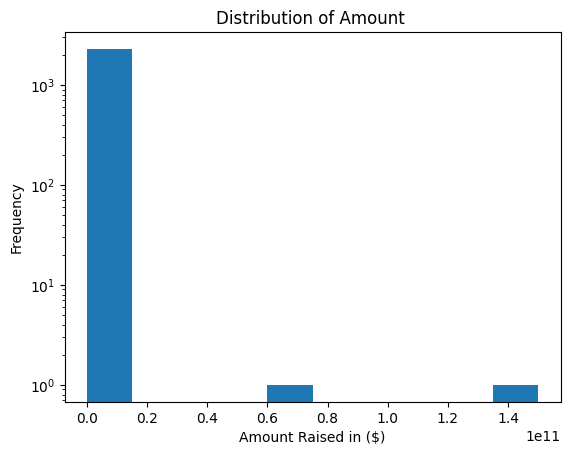

In [64]:
# Plotting A histogram to visualize the distribution of funding amouns

plt.hist(data_combined['Amount($)'], bins=10,log=True)
plt.xlabel('Amount Raised in ($)')
plt.ylabel('Frequency')
plt.title('Distribution of Amount ')
plt.show()

The Histogram shows:

The distribution of the 'Amount' column, indicating that the majority of values are concentrated in the lower range with high frequency, while the higher values are sparsely distributed.

### identifying the outliers

In [65]:
# Calculate z-score for the 'Amount($)' column  
z_scores = (data_combined['Amount($)'] - data_combined['Amount($)'].mean()) / data_combined['Amount($)'].std()

# Set a threshold for identifying outliers (e.g., z-score > 3 or z-score < -3)
outliers = data_combined[np.abs(z_scores) > 3]

# Display the outlier(s) and their corresponding information
outliers

,Company_Name,Founded,HeadQuarter,Sector,What_it_does,Investor,Amount($),Stage,Funding_Year
73,Alteria Capital,2018.0,Mumbai,FinTech,Alteria Capital is a Venture debt firm .,unidisclosed,1.500000e+11,Debt,2021
1489,Reliance Retail Ventures Ltd,2006.0,Mumbai,Retail,Reliance Retail offers online shopping and a c...,"Silver Lake, Mubadala Investment Company",7.000000e+10,Undisclosed,2020


Based on the z-score analysis, we have identified an outlier in the 'Amount' column of the data_combined. The outlier corresponds to the startup 'Reliance Retail Ventures Ltd' and Alteria Capital located in Mumbai, with a funding amount of $70 billion (7.0e+10) and $150 billion(1.500000e+11).

In [66]:
# Find startups with "Reliance" in their names
Reliance_startups = data_combined[data_combined['Company_Name'].str.contains('Reliance')]
Reliance_startups

,Company_Name,Founded,HeadQuarter,Sector,What_it_does,Investor,Amount($),Stage,Funding_Year
1374,Reliance Retail,2006.0,Mumbai,E-commerce,Reliance Retail Ventures Limited is a subsidia...,"Abu Dhabi Investment Authority, GIC",1.000000e+07,Undisclosed,2020
1489,Reliance Retail Ventures Ltd,2006.0,Mumbai,Retail,Reliance Retail offers online shopping and a c...,"Silver Lake, Mubadala Investment Company",7.000000e+10,Undisclosed,2020
1511,Reliance Retail Ventures,2006.0,Mumbai,E-commerce,Reliance Retail offers online shopping and a c...,"General Atlantic, Kohlberg Kravis Roberts",8.000000e+08,Undisclosed,2020
1537,Reliance,1973.0,Mumbai,Multinational conglomerate company,Reliance owns businesses across India engaged ...,"Facebook, Google, KKR, Silver Lake",2.200000e+09,Undisclosed,2020
1573,Reliance Retail,2006.0,Mumbai,E-commerce,Retailer delivering superior value to its cust...,Silver Lake Partners,1.022000e+07,Undisclosed,2020


In [67]:
# Find startups with "Reliance" in their names
Alteria_Capital = data_combined[data_combined['Company_Name'].str.contains('Alteria Capital')]
Alteria_Capital

,Company_Name,Founded,HeadQuarter,Sector,What_it_does,Investor,Amount($),Stage,Funding_Year
73,Alteria Capital,2018.0,Mumbai,FinTech,Alteria Capital is a Venture debt firm .,unidisclosed,1.500000e+11,Debt,2021


Outliers are only present in the 'Amount' section for Mumbai headquarters, for the funding year 2020 and 2021. This will cause skewness, which is important to address because part of my research question focuses on identifying which headquarters has the most funding.

In [68]:
# Remove outliers from the dataset
combined_data= data_combined[np.abs(z_scores) <= 3]

In [69]:

# Calculate the median of 'Amount($)' column

median_amount = combined_data['Amount($)'].median()

# Replace NaN values with median

combined_data['Amount($)'].fillna(median_amount, inplace=True)

# The updated dataframe

combined_data.loc[300:330].head()

,Company_Name,Founded,HeadQuarter,Sector,What_it_does,Investor,Amount($),Stage,Funding_Year
300,Verandah,2011.0,Mumbai,Apparel & Fashion,Verandah is a conscious luxury travel brand re...,"Mike Novogratz, Neeraj Arora",1000000.0,Seed,2021
302,OWO Technologies,2020.0,Gurugram,Food & Beverages,An ecommerce startup offering online beverages...,unidisclosed,3000000.0,Seed,2021
303,EsportsXO,2020.0,Bangalore,Mobile Games,EsportsXO is an esports tournament management ...,We Founder Circle,1100000.0,Seed,2021
306,Neobank Jupiter,2019.0,Mumbai,Banking,Jupiter is a digital banking app with one simp...,"Tiger Global, Sequoia Capital",86000000.0,Series C,2021
307,Skippi Ice Pops,2021.0,Hyderabad,Food Production,India's First Icepops Brand,Shark Tank India,130000.0,Undisclosed,2021


In [70]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2291 entries, 0 to 2878
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company_Name  2291 non-null   object 
 1   Founded       1743 non-null   float64
 2   HeadQuarter   2291 non-null   object 
 3   Sector        2291 non-null   object 
 4   What_it_does  2291 non-null   object 
 5   Investor      2291 non-null   object 
 6   Amount($)     2291 non-null   float64
 7   Stage         2291 non-null   object 
 8   Funding_Year  2291 non-null   int32  
dtypes: float64(2), int32(1), object(6)
memory usage: 234.6+ KB


###  Save the merged dataset to a new csv file

In [71]:
combined_data.to_csv('combined_data.csv', index=False)

 ### Univariate analysis 

array([[<Axes: title={'center': 'Founded'}>,
        <Axes: title={'center': 'Amount($)'}>],
       [<Axes: title={'center': 'Funding_Year'}>, <Axes: >]], dtype=object)

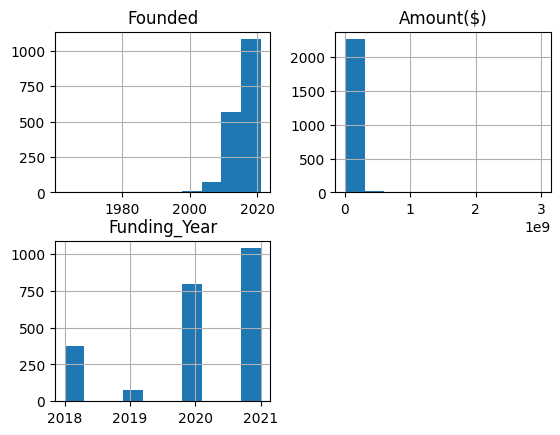

In [72]:
# Histogram
combined_data.hist()  

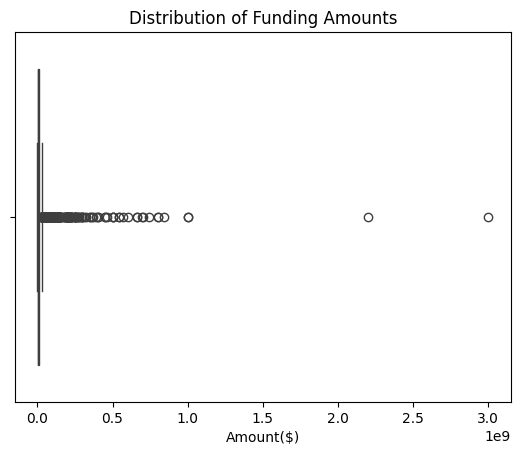

In [73]:
# Distribution of funding amounts using a boxplot
sns.boxplot(x=combined_data['Amount($)'])
plt.xlabel('Amount($)')
plt.title('Distribution of Funding Amounts')
plt.show()

The box plot indicates that the investments made in between 2018 and 2021 do not fall within a normal distribution. 
The box plot is asymmetrical indicating a positively skewed distribution since the data is clustered towards the left-hand side of the plot.

In [74]:
combined_data['Funding_Year'] = combined_data['Funding_Year'].astype(int)



### Multivariate analysis of Amount and funding year

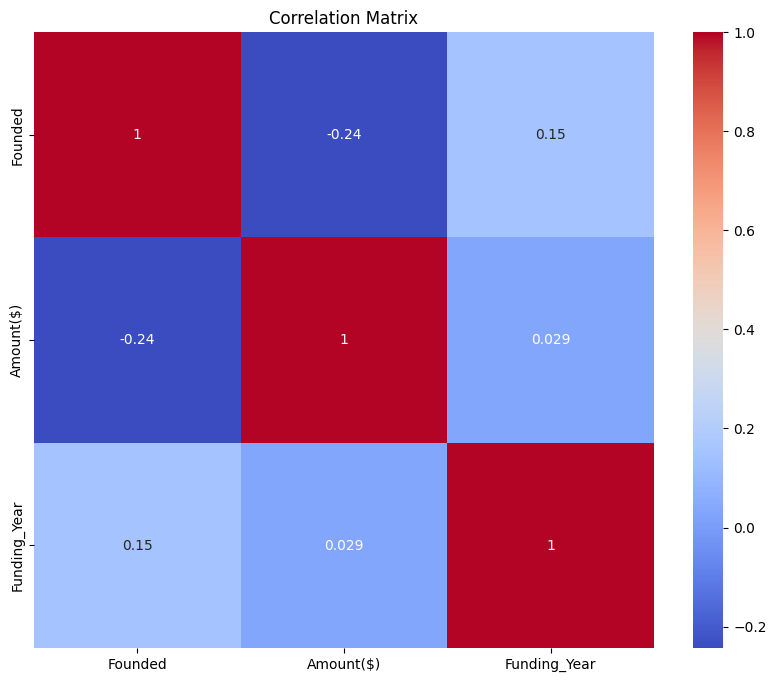

In [75]:

combined_data['Funding_Year'] = pd.to_numeric(combined_data['Funding_Year'], errors='coerce')
combined_data['Amount($)'] = pd.to_numeric(combined_data['Amount($)'], errors='coerce')

combined_data.dropna(subset=['Funding_Year', 'Amount($)'], inplace=True)

numeric_cols = combined_data.select_dtypes(include=[np.number])

correlation_matrix = numeric_cols.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

The heatmap shows a correlation coefficient of 0.029 is very close to 0, indicating a negligible linear relationship.This suggests that there is no strong evidence that funding amounts are increasing or decreasing significantly over the years

### Hypothesis Testing

Restatement of Hypothesis 

Null Hypothesis (H0): Funding to start-ups is centralized around specific sectors.

Alternative Hypothesis (H1): Funding to start-ups is spread across different sectors.

ANOVA test

In [76]:
# Group the data by sector
grouped_by_sector = combined_data.groupby('Sector')['Amount($)'].apply(list)

# Perform ANOVA test
f_statistic, p_value = stats.f_oneway(*grouped_by_sector)

# Print the results
print("ANOVA Test Results:")
print("F-statistic:", f_statistic)
print("p-value:", p_value)

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis. Funding to start-ups is centralized around specific sectors.")
else:
    print("Fail to reject the null hypothesis. Funding to start-ups is spread across different sectors.")

ANOVA Test Results:
F-statistic: 1.935070955139799
p-value: 4.088881711727091e-22
Reject the null hypothesis. Funding to start-ups is centralized around specific sectors.


## Answering the research questions.

### 1.How has funding to startups changed over the period of time?

Text(0.5, 1.0, 'Trend of Funding Over the Years')

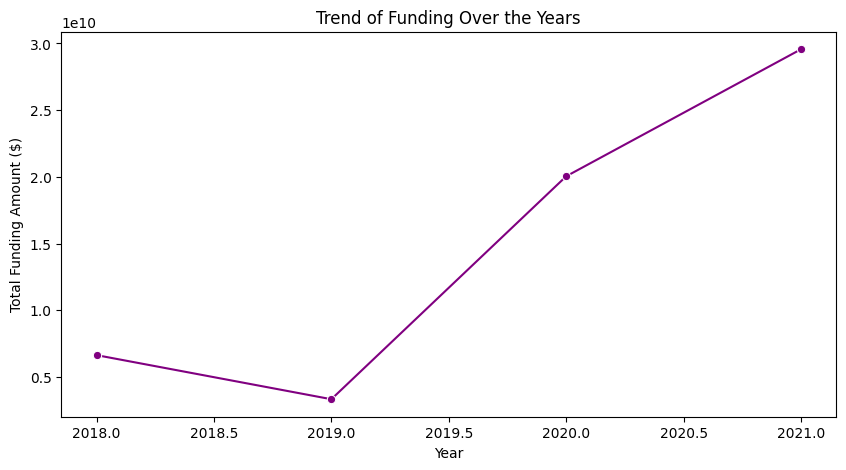

In [77]:
# Group and sum the data by year
funding_by_year = combined_data.groupby('Funding_Year')['Amount($)'].sum().reset_index()

# Create the plot
plt.figure(figsize=(10, 5))
sns.lineplot(x='Funding_Year', y='Amount($)', data=funding_by_year, marker='o', color='purple')


# Set the labels and title
plt.xlabel('Year')
plt.ylabel('Total Funding Amount ($)')
plt.title('Trend of Funding Over the Years')


Between 2018 and 2019, there was a decline in the total funding received by Indian startups. However, from 2019 to 2021, there was a steady upward trend in funding, indicating a significant transformation in the funding landscape for Indian startups during this period.

### 2.What is the average amount of funding for start-ups ?

In [78]:
# Calculate the average amount of funding
average_funding = combined_data['Amount($)'].mean()

# Print the average amount of funding
print(f"The average amount of funding for start-ups is ${average_funding:,.2f}.")

The average amount of funding for start-ups is $26,012,876.90.


### 3a-Which headquarter is the most preferred startup location?

In [79]:
# count of the values for each headquarter 
top_10_headquarters = combined_data['HeadQuarter'].value_counts().head(10)
top_10_headquarters

HeadQuarter
Bangalore      760
Mumbai         370
Gurugram       208
New Delhi      182
Unavailable     94
Chennai         93
Pune            75
Gurgaon         64
Noida           62
Hyderabad       62
Name: count, dtype: int64

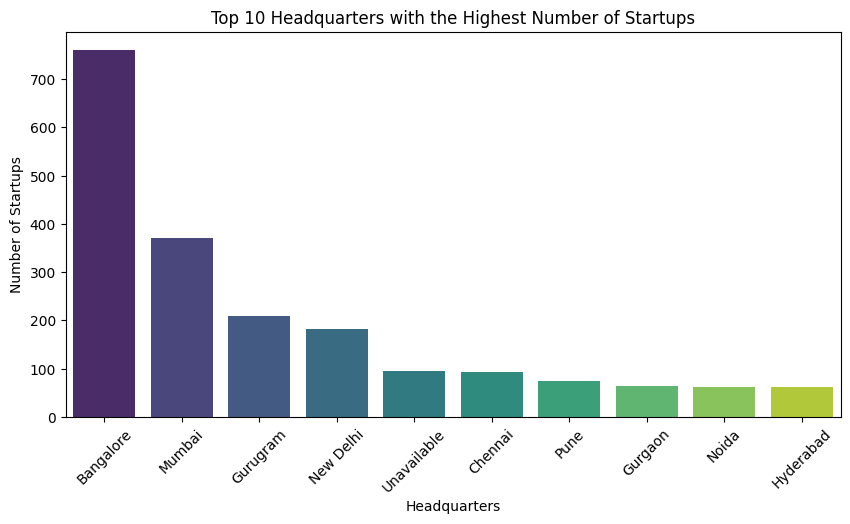

In [80]:
# Create the bar plot
plt.figure(figsize=(10, 5))
sns.barplot(x=top_10_headquarters.index, y=top_10_headquarters.values, palette='viridis')

# Set the labels and title
plt.xlabel('Headquarters')
plt.ylabel('Number of Startups')
plt.title('Top 10 Headquarters with the Highest Number of Startups')

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Display the plot
plt.show()

Bangalore has the highest number of startups in the dataset, followed by Mumbai, Gurugram, and New Delhi. These cities have a significant presence in the startup ecosystem, indicating a favorable environment for entrepreneurship and innovation.

### 3b-Which headquarters  received the highest amount of funding?

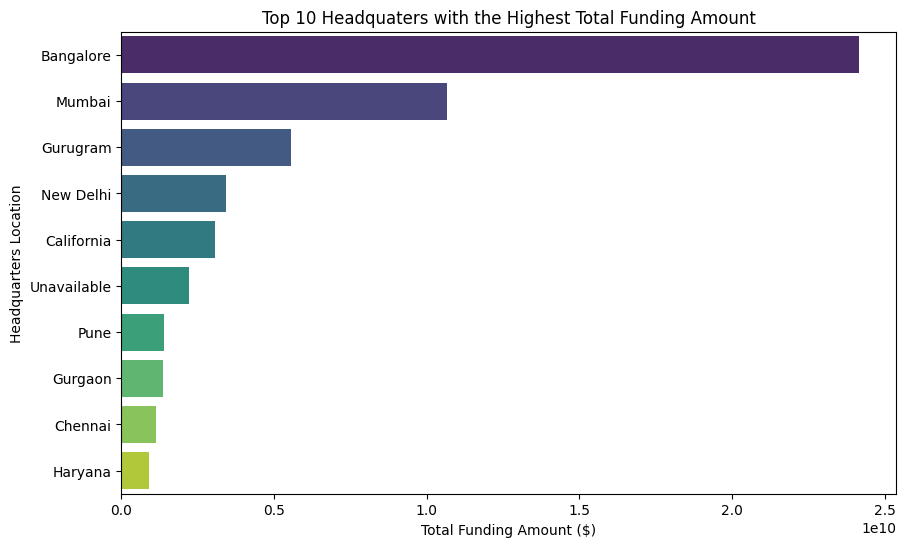

In [81]:
# Group the data by headquarters location and calculate the total funding amount
location_funding = combined_data.groupby('HeadQuarter')['Amount($)'].sum()

# Sort the locations by funding amount in descending order and get the top 10
top_10_locations = location_funding.nlargest(10)
top_10_locations

# Plot the total funding amount for the top 10 locations
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_locations.values, y=top_10_locations.index, palette='viridis')

# Set the labels and title
plt.xlabel('Total Funding Amount ($)')
plt.ylabel('Headquarters Location')
plt.title('Top 10 Headquaters with the Highest Total Funding Amount')

# Display the plot
plt.show()


The top headquarters with the highest startup funding in the Indian start up ecosystem are Bangalore, Mumbai, Gurugram and New Delhi. Each of these locations offers distinct advantages, including a vibrant ecosystem, access to capital, a pool of skilled talent, and robust industry networks

### 4a- Which sector has the highest funding amount?

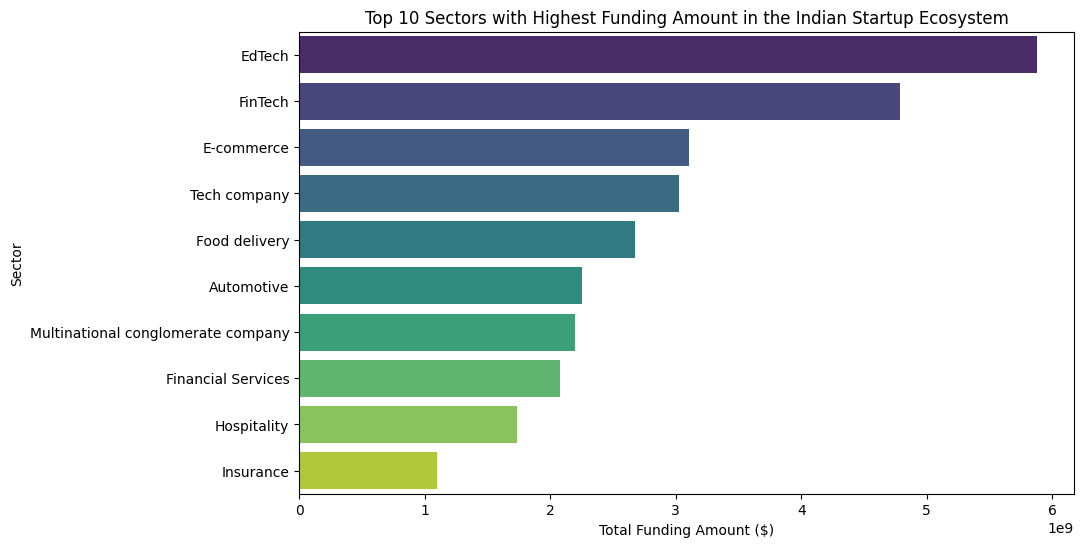

In [82]:
# Calculate the total funding amount per sector by grouping the data based on the 'Sector' column and then summing the 'Amount($)' column. 

top_10_sectors = combined_data.groupby('Sector')['Amount($)'].sum().sort_values(ascending=False).head(10)

# Plotting a horizontal bar graph showing the total funding amount for the top 10 sectors.

plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_sectors.values, y=top_10_sectors.index, palette='viridis')
plt.xlabel('Total Funding Amount ($)')
plt.ylabel('Sector')
plt.title('Top 10 Sectors with Highest Funding Amount in the Indian Startup Ecosystem')
plt.show()

The horizontal bar graph visualization highlights the funding distribution across different sectors in India. The EdTech sector has received the highest funding amount, followed by fintech and E commerce. 

### 4b.Which sectors are most favoured by investors?

In [83]:
# count of the values for each headquarter 
top_10 = combined_data.groupby('Sector').Investor.count().nlargest(10)
top_10

Sector
FinTech                              222
EdTech                               175
E-commerce                            85
Financial Services                    79
AgriTech                              55
HealthCare                            47
Automotive                            45
HealthTech                            43
Unavailable                           36
Information Technology & Services     34
Name: Investor, dtype: int64

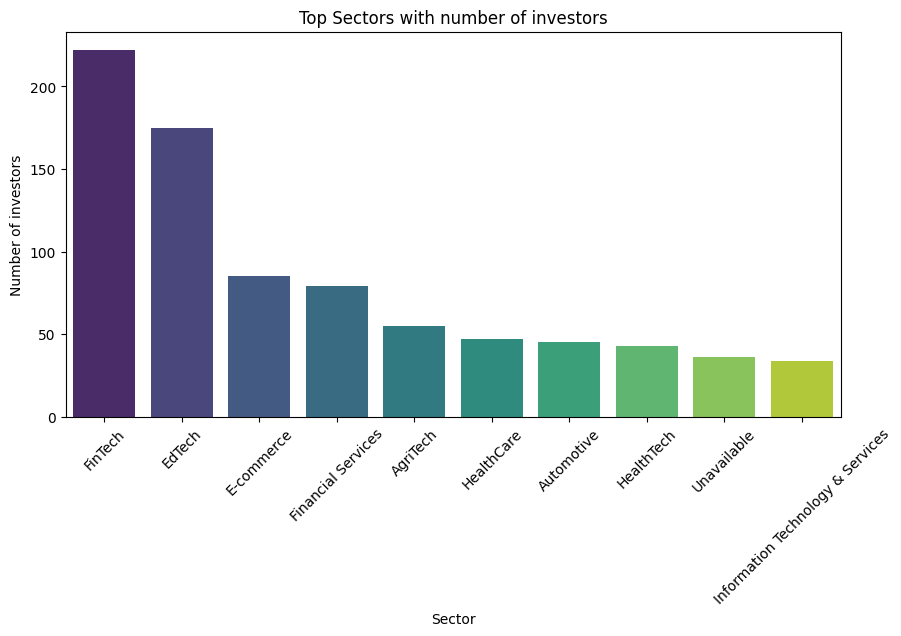

In [84]:
# Create the bar plot
plt.figure(figsize=(10, 5))
sns.barplot(x=top_10.index, y=top_10.values, palette='viridis')

# Set the labels and title
plt.xlabel('Sector')
plt.ylabel('Number of investors')
plt.title('Top Sectors with number of investors')

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Display the plot
plt.show()

The majority of investors have allocated their funds to the FinTech space, followed by the EdTech and Ecommerce sectors. However, within the Indian startup ecosystem, the EdTech sector has received more overall funding


### 5. What are the most common funding stage among Indian startups?

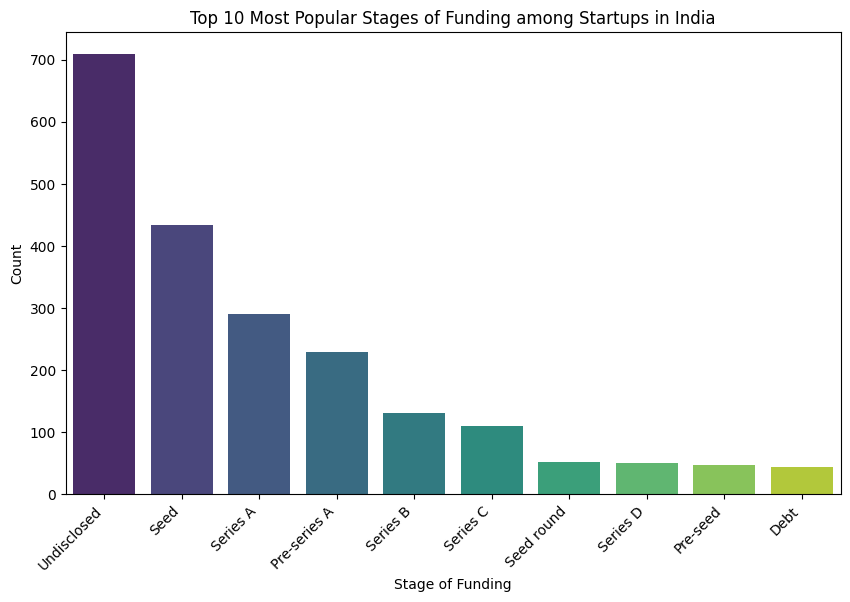

In [85]:
# A value counts of the 'Stage' column and using the .head(10) function to sort the top 10 stages in descending order.
top_10_stages = combined_data['Stage'].value_counts().head(10)

# Plot a bar chart of the number of Top 10 Most Popular Stages of Funding among Startups in India
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_stages.index, y=top_10_stages.values, palette='viridis')
plt.xlabel('Stage of Funding')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Most Popular Stages of Funding among Startups in India')
plt.show()

The bar chart showcases the funding stages of startups in India. It highlights that a significant number of startups did not disclose their funding stages, while the most common disclosed stage was Seed. The chart also illustrates the progression from Seed to subsequent stages like Series A, Pre-series A, and Series B. Additionally, it reveals the presence of later-stage funding rounds such as Series C ,seed round and even debt. The chart indicates the diversity of funding stages and the overall vibrancy of the Indian startup ecosystem.

### 6 Who are the top investors by the amount invested?

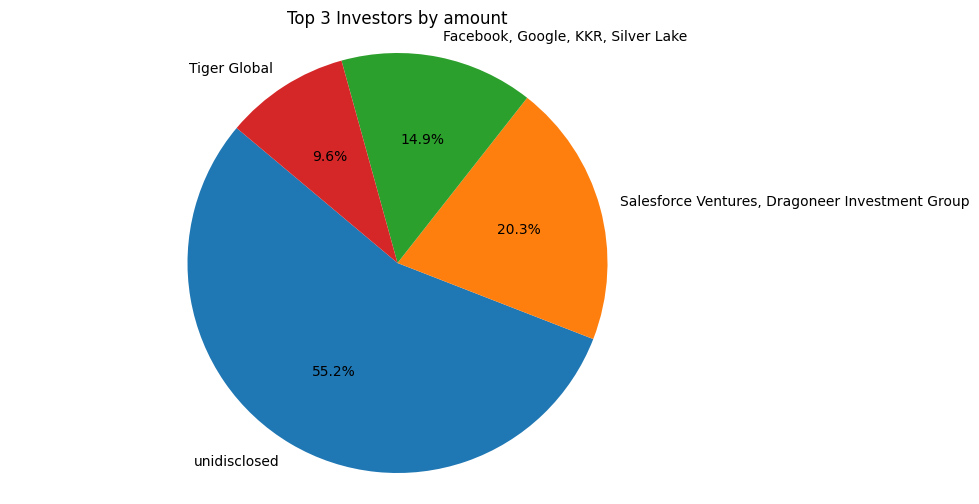

In [86]:
# Group by investor, sum the amounts, sort, and get the top 4
top_4_investors = combined_data.groupby('Investor')['Amount($)'].sum().sort_values(ascending=False).head(4)

# Plotting the pie chart
plt.figure(figsize=(10, 6))
plt.pie(top_4_investors, labels=top_4_investors.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 3 Investors by amount')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

The majority of companies did not disclose their investors. However, among those that did, the top investors by investment amount are Salesforce Ventures, followed by Silver Lake, and then Tiger Global.

### Findings and Recommendations

### Analysis on Sector:

Analysis on the Sector indicate that The majority of investors have allocated their funds to the FinTech space, followed by the EdTech and Ecommerce sectors. However, within the Indian startup ecosystem, the EdTech sector has received more overall funding.

EdTech stands out as a particularly strong recommendation to invest in. It has a demonstrated track record of attracting significant funding, likely due to the rising demand for digital education solutions in India. However, both FinTech and Ecommerce also present substantial opportunities and should be considered.

### Analysis on Location:
The top headquarters with the highest startup funding in the Indian start up ecosystem are Bangalore, Mumbai, Gurugram and New Delhi. Each of these locations offers distinct advantages, including a vibrant ecosystem, access to capital, a pool of skilled talent, and robust industry networks.


### Analysis on investors:
The majority of companies did not disclose their investors. However, among those that did, the top investors by investment amount are Salesforce Ventures, followed by Silver Lake, and then Tiger Global.These are the financiers worth considering when venturing into the ecosystem.
